In [1]:
import Pkg

In [2]:
using Pkg
ENV["PYTHON"] ="/Users/ebubeajulu/anaconda3/envs/rms_env/bin/python"
ENV["RMS_ENV"] ="/Users/ebubeajulu/anaconda3/envs/rms_env"
Pkg.add("PyCall")
Pkg.build("PyCall")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
  Building Conda ─→ `~/.julia/packages/Conda/3rPhK/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/ttONZ/deps/build.log`


false

In [3]:
using Pkg
#Pkg.add("ReactionMechanismSimulator") #it has already been added no need to do add again
Pkg.build("ReactionMechanismSimulator")
using DifferentialEquations
using PyPlot
using ReactionMechanismSimulator


  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/ne2iw/deps/build.log`
  Building Clp ─────────────→ `~/.julia/packages/Clp/IBQzB/deps/build.log`
  Building Conda ───────────→ `~/.julia/packages/Conda/3rPhK/deps/build.log`
  Building PyCall ──────────→ `~/.julia/packages/PyCall/ttONZ/deps/build.log`
  Building FFTW ────────────→ `~/.julia/packages/FFTW/loJ3F/deps/build.log`
  Building Dierckx ─────────→ `~/.julia/packages/Dierckx/9SY4A/deps/build.log`
  Building Sass ────────────→ `~/.julia/packages/Sass/EZMlY/deps/build.log`
  Building Sundials ────────→ `~/.julia/packages/Sundials/CRi5j/deps/build.log`


┌ Info: Recompiling stale cache file /Users/ebubeajulu/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Info: Recompiling stale cache file /Users/ebubeajulu/.julia/compiled/v1.2/ReactionMechanismSimulator/klXCL.ji for ReactionMechanismSimulator [311e5216-15cf-11e9-05d7-a146a2b8c9cd]
└ @ Base loading.jl:1240
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead

In [15]:
phaseDict = readinput("/Users/ebubeajulu/Code/GTL/nc10/nc10_lowT/rms/chem805.rms")

[13:49:45] WARNING: not removing hydrogen atom without neighbors


Dict{Any,Any} with 1 entry:
  "phase" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertain…

In [16]:
spcs = phaseDict["phase"]["Species"]; #mechanism dictionaries index:  phaseDict[phasename]["Species" or "Reactions"]
rxns = phaseDict["phase"]["Reactions"];

In [17]:
ig = IdealGas(spcs,rxns,name="gas"); #Define the phase (how species thermodynamic and kinetic properties calculated)
initialconds = Dict(["T"=>880.0,"P"=>15e5,"nC10H22"=>0.0166,"O2"=>1, "N2"=>3.825, "Ar"=>3.825]); #Set simulation Initial Temp and Pressure
domain,y0 = ConstantTPDomain(phase=ig,initialconds=initialconds;sensitivity=false); #Define the domain (encodes how system thermodynamic properties calculated)

In [18]:
react = Reactor(domain,y0,(0.0,150.1)); #Create the reactor object

In [19]:
sol = solve(react.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6); #solve the ode associated with the reactor


[CVODES ERROR]  CVode
  At t = 1.00025 and h = 2.48416e-07, the error test failed repeatedly or with |h| = hmin.



In [20]:
bsol = Simulation(sol,domain);

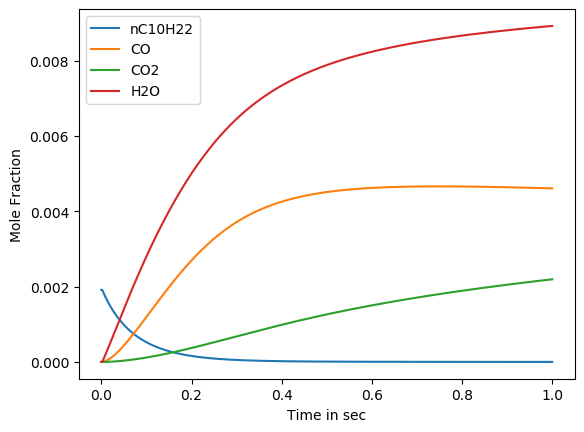

PyObject Text(24.0, 0.5, 'Mole Fraction')

In [23]:
plotmolefractions(bsol,1.0; t0=1e-15, N=1000, tol=0.001, exclude=["O2","Ar","N2"])

In [14]:
plotmaxratesensitivity(bsol,"H2")

BoundsError: BoundsError: attempt to access 805-element Array{Float64,1} at index [876]

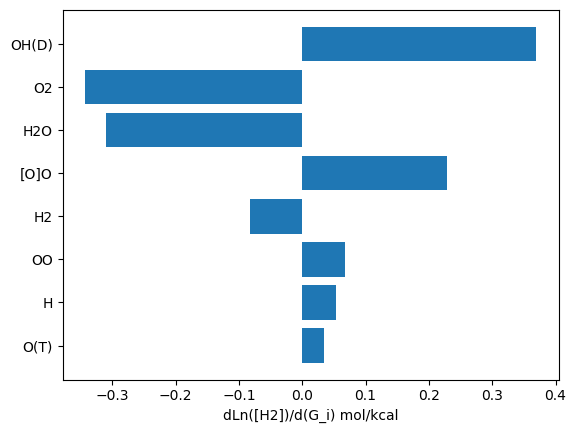

PyObject Text(0.5, 24.140625, 'dLn([H2])/d(G_i) mol/kcal')

In [17]:
plotmaxthermosensitivity(bsol,"H2")

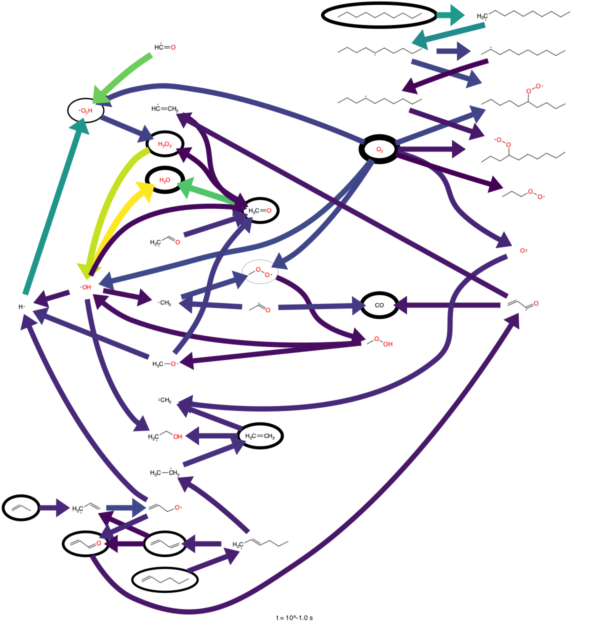

In [24]:
getfluxdiagram(bsol,0.1)

In [25]:
Pkg.add("Images")
Pkg.add("QuartzImageIO")
using Images
using QuartzImageIO

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


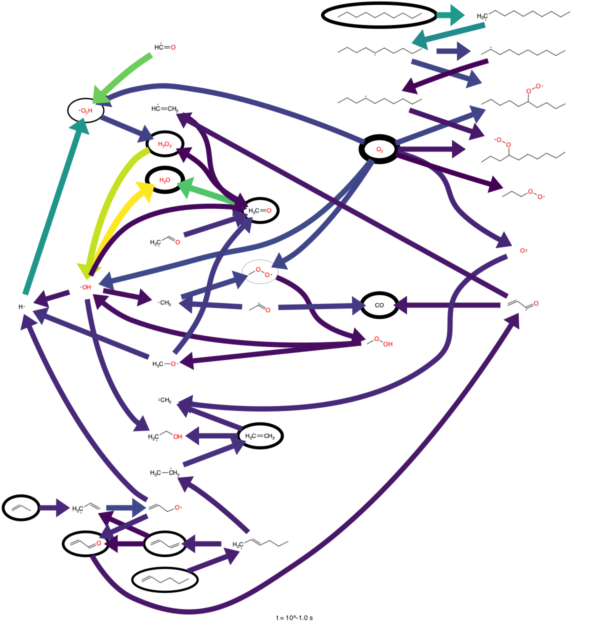

In [26]:
load("/Users/ebubeajulu/Code/GTL/nc10/fluxdiagrams/flux_diagram_1.png")